In [1]:
include("../src/HDC.jl")
include("../src/math.jl")
include("../src/experimental.jl")
using JLD
using MLJ
using MLDataPattern
using DataFrames
using XGBoost
using MLJXGBoostInterface
using Plots
using MultivariateStats
using MLJBase
using Printf

In [2]:
phalp_bow_esm = JLD.load("../data/phalp_bow_esm.jld")["embedded_bow_esm"]
phalp_bow_rand = JLD.load("../data/phalp_bow_rand.jld")["embedded_rand_bow"]
phalp_cnn_esm = JLD.load("../data/phalp_CNN_esm.jld")["embedded_CNN_esm"]
upi2doms = JLD.load("../data/phalp_upi2doms.jld")["upi2doms"]
domacc2domname = JLD.load("../data/phalp_domacc2domname.jld")["domacc2domname"]
phalp_cnn_rand = JLD.load("../data/phalp_cnn_rand.jld")["embedded_rand_CNN"]
non_ml = JLD.load("../data/phalp_non_ml.jld")["up_evd_type"]
ml_pred = JLD.load("../data/phalp_ml.jld")["up_evd_type_ML"]
up2type = JLD.load("../data/phalp_type.jld")["up2type"]

┌ Warning: type InlineStrings.String31 not present in workspace; reconstructing
└ @ JLD /home/mfat/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


Dict{String, Union{Missing, String}} with 11549 entries:
  "UPI000178DD30" => "endolysin"
  "UPI0013EFDC93" => "endolysin"
  "UPI000172D062" => "VAL"
  "UPI001463ABBB" => "endolysin"
  "UPI000232F56D" => "endolysin"
  "UPI0011625D30" => "VAL"
  "UPI0009882324" => "endolysin"
  "UPI000CA1D611" => "VAL"
  "UPI0006BC2F8A" => "endolysin"
  "UPI000BBF7878" => "endolysin"
  "UPI00138B2696" => "endolysin"
  "UPI00025D6AED" => "endolysin"
  "UPI0010C2D3EE" => "endolysin"
  "UPI000D22144F" => "VAL"
  "UPI0018623B24" => "endolysin"
  "UPI00080F0655" => "endolysin"
  "UPI00022BD3A3" => "endolysin"
  "UPI0008093543" => "endolysin"
  "UPI001463E938" => "VAL"
  ⋮               => ⋮

In [18]:
new = filter(x -> (first(x) in collect(keys(non_ml))), up2type)
val = filter(x -> (last(x) == "VAL"), new)
endo = filter(x -> (last(x) == "endolysin"), new)

Dict{String, Union{Missing, String}} with 2803 entries:
  "UPI000178DD30" => "endolysin"
  "UPI0012B4B15F" => "endolysin"
  "UPI0013EFDC93" => "endolysin"
  "UPI000201BE9F" => "endolysin"
  "UPI000232F56D" => "endolysin"
  "UPI000DF0A1E1" => "endolysin"
  "UPI00138B2696" => "endolysin"
  "UPI000012EA4B" => "endolysin"
  "UPI000178C353" => "endolysin"
  "UPI001436E76F" => "endolysin"
  "UPI000F6BA7D8" => "endolysin"
  "UPI00001A38F6" => "endolysin"
  "UPI00001A9BAB" => "endolysin"
  "UPI001435C02C" => "endolysin"
  "UPI0010B96635" => "endolysin"
  "UPI0015F22725" => "endolysin"
  "UPI000D7DCFA8" => "endolysin"
  "UPI0010B8D78B" => "endolysin"
  "UPI000EB70E47" => "endolysin"
  ⋮               => ⋮

In [4]:
function plot_seq(embeddings, name)
    Keys = [key for (key, val) in new]
    key_seq = nested_arrays2mat([embeddings[i] for i in Keys], true) # change emebeddings here
    Values = [val for (key, val) in new]

    PCA_fit= MultivariateStats.fit(PCA, key_seq; maxoutdim=2)
    proj= projection(PCA_fit)

    types = collect(Set(Values))
    indices = [[j for j in 1:length(Values) if Values[j] == i] for i in types]

    colors = [:green, :red]
    fig = Plots.plot()

    for i in 1:2
        scatter!(fig, (proj[indices[i], 1], proj[indices[i], 2]), label=types[i], mc = colors[i])
    end

    dir = @sprintf("../thesis/Fig/%s.png", name)
    savefig(dir)
    return [fig,PCA_fit]
end

plot_seq (generic function with 1 method)

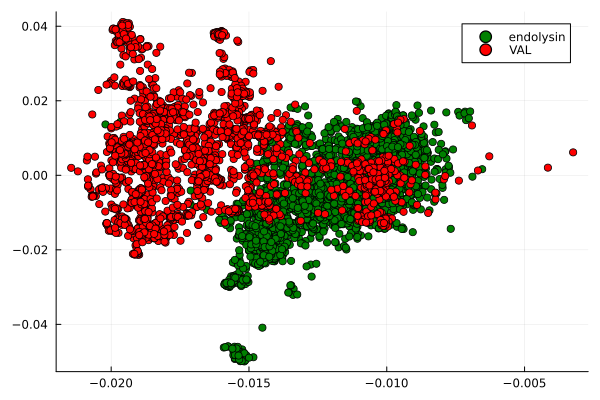

In [5]:
phalp_bow_esm_pca = plot_seq(phalp_bow_esm, "phalp_bow_esm")
phalp_bow_esm_pca[1]

In [6]:
phalp_bow_esm_pca[2]

PCA(indim = 4829, outdim = 2, principalratio = 0.15570303827895657)

Pattern matrix (unstandardized loadings):
─────────────────────────────
            PC1           PC2
─────────────────────────────
1     0.134078   -0.030074
2     0.189303    0.0692128
3     0.165758    0.0747468
4     0.188317   -0.0120207
5     0.210754   -0.0342629
6     0.191881    0.0655137
7     0.239148   -0.061523
8     0.246821   -0.0827474
9     0.141996    0.0710726
10    0.128876   -0.0732588
11    0.16556    -0.0347231
12    0.250865   -0.175775
13    0.254339   -0.0326583
14    0.199449   -0.0542407
15    0.234552    0.0704962
16    0.240243    0.0437918
17    0.18492    -0.0258111
18    0.199526   -0.110958
19    0.238981   -0.0148345
20    0.24668     0.0762202
21    0.131476   -0.0278362
22    0.127307   -0.048631
23    0.254775   -0.0226173
24    0.244339    0.0595415
25    0.115861   -0.0395667
26    0.167718   -0.050846
27    0.143235    0.0148852
28    0.182984    0.000767517
29    0.126503   -0

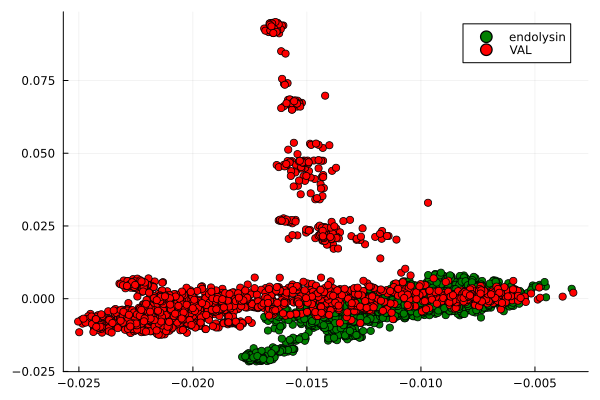

In [7]:
phalp_bow_rand_pca = plot_seq(phalp_bow_rand, "phalp_bow_rand")
phalp_bow_rand_pca[1]

In [8]:
phalp_bow_rand_pca[2]

PCA(indim = 4829, outdim = 2, principalratio = 0.06961090147372911)

Pattern matrix (unstandardized loadings):
─────────────────────────────
            PC1           PC2
─────────────────────────────
1     0.0694931   0.0199207
2     0.113126   -0.0245416
3     0.0894223  -0.00393791
4     0.0862     -0.00426121
5     0.110147    0.00941542
6     0.105269   -0.0188081
7     0.151784   -0.0123866
8     0.164889   -0.00637764
9     0.0852768  -0.019466
10    0.0792216   0.0208769
11    0.0911912  -0.000197449
12    0.182383    0.0166592
13    0.184753   -0.0300429
14    0.107317    0.00113675
15    0.181287   -0.0367335
16    0.168238   -0.0173544
17    0.0821427   0.00828975
18    0.125996    0.206224
19    0.163876   -0.0140855
20    0.186364   -0.0465477
21    0.0759125  -0.00612978
22    0.0592932   0.00334544
23    0.188749   -0.035383
24    0.185846   -0.0489919
25    0.0644999   0.0230687
26    0.0919032   0.0108622
27    0.0865449   0.00941774
28    0.101986    0.000599997
29   

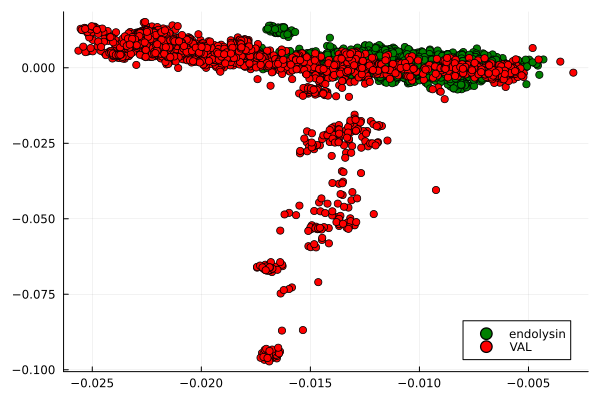

In [9]:
phalp_cnn_rand_pca = plot_seq(phalp_cnn_rand, "phalp_cnn_rand")
phalp_cnn_rand_pca[1]

In [10]:
phalp_cnn_rand_pca[2]

PCA(indim = 4829, outdim = 2, principalratio = 0.06710463978218502)

Pattern matrix (unstandardized loadings):
─────────────────────────────
            PC1           PC2
─────────────────────────────
1     0.0604694   0.0120732
2     0.119566   -0.0159045
3     0.107805    0.00185077
4     0.0995039  -0.0135011
5     0.101261   -0.00370308
6     0.0925685  -0.00573958
7     0.155356   -0.0263583
8     0.16804    -0.0287685
9     0.0920246  -0.0166864
10    0.0590515  -0.00334981
11    0.0768163  -0.00318149
12    0.180384   -0.0450917
13    0.17828    -0.0349492
14    0.105526   -0.00113709
15    0.185536   -0.0334439
16    0.172888   -0.012304
17    0.0827255   0.0165533
18    0.115584    0.236393
19    0.166052   -0.0344827
20    0.184444   -0.0365332
21    0.0627786  -0.00496629
22    0.0746057   0.0116746
23    0.193376   -0.0226682
24    0.1834     -0.0285024
25    0.065914   -0.00696435
26    0.0738847   0.0068441
27    0.0652135  -0.00504717
28    0.101303   -0.00189362
29    0

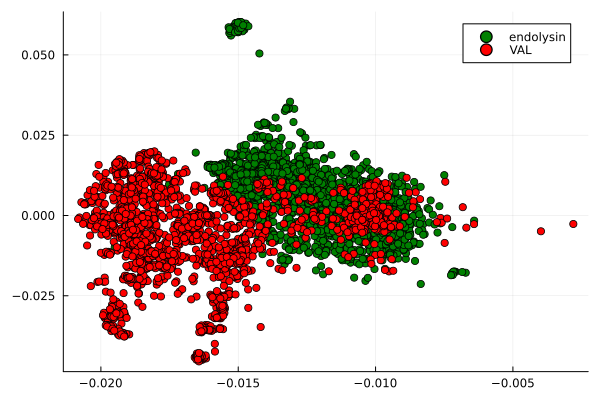

In [11]:
phalp_cnn_esm_pca = plot_seq(phalp_cnn_esm, "phalp_cnn_esm")
phalp_cnn_esm_pca[1]

In [12]:
phalp_cnn_esm_pca[2]

PCA(indim = 4829, outdim = 2, principalratio = 0.15897917053818664)

Pattern matrix (unstandardized loadings):
─────────────────────────────
            PC1           PC2
─────────────────────────────
1     0.129992   -0.0166614
2     0.205641    0.0547999
3     0.177483    0.0998852
4     0.190469   -0.00273652
5     0.211661   -0.0109271
6     0.184707    0.0475257
7     0.244502   -0.0696414
8     0.246179   -0.0462713
9     0.134834    0.062625
10    0.128278   -0.0454926
11    0.159873   -0.0473435
12    0.254916   -0.15396
13    0.246803   -0.0225598
14    0.209477   -0.0438204
15    0.236836    0.0535859
16    0.245364    0.0491643
17    0.181105   -0.0369066
18    0.205767   -0.138483
19    0.249857   -0.0203383
20    0.242836    0.0460299
21    0.139876   -0.0263266
22    0.139305   -0.0480324
23    0.261638   -0.0116974
24    0.247523    0.0680327
25    0.123951   -0.00986604
26    0.165078   -0.0437596
27    0.136474   -0.0041401
28    0.196784    0.0101527
29    0.129388   

# Type classifier

In [13]:
function type_classifiercv(embeddings, k=10)

    Keys = [key for (key, val) in new]
    key_seq = [embeddings[i] for i in Keys] # change mebeddings here
    Values = [val for (key, val) in new]

    stratified_cv = StratifiedCV(;nfolds=k)
    pairs = MLJBase.train_test_pairs(stratified_cv, 1:length(Keys), Values)

    f1 = 0

    for i in pairs
        train = i[1]
        test = i[2]

        val_hdv = bitadd([key_seq[train[j]] for j in 1:length(train) if Values[train[j]] == "VAL"]...)
        endo_hdv = bitadd([key_seq[train[j]] for j in 1:length(train) if Values[train[j]] == "endolysin"]...)

        confusion_matrix = zeros(2,2)

        for x in 1:length(test)
            endo_sim = hamming(key_seq[test[x]], endo_hdv)
            val_sim = hamming(key_seq[test[x]], val_hdv)
            if endo_sim > val_sim
                if Values[test[x]] == "endolysin"
                    confusion_matrix[1,1] += 1
                else
                    confusion_matrix[2,1] += 1
                end
            else
                if Values[test[x]] == "VAL"
                    confusion_matrix[2,2] += 1
                else
                    confusion_matrix[1,2] += 1
                end
            end
        end
        println(confusion_matrix)
        prec = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[1,2])
        recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[2,1])

        f1 += 2 * (prec*recall)/(prec+recall)
    end
    return f1/k
end

type_classifiercv (generic function with 2 methods)

In [20]:
function type_classifiercv_rand(embeddings, k=10, train_size=100)

    Keys = [key for (key, val) in new2]
    key_seq = [embeddings[i] for i in Keys] # change mebeddings here
    Values = [val for (key, val) in new2]

    stratified_cv = StratifiedCV(;nfolds=k)
    pairs = MLJBase.train_test_pairs(stratified_cv, 1:length(new2), Values)

    f1 = 0

    for i in pairs
        train = i[1]
        test = i[2]

        train_ind = rand(1:length(train), train_size)

        val_hdv = bitadd([key_seq[train[j]] for j in train_ind if Values[train[j]] == "VAL"]...)
        endo_hdv = bitadd([key_seq[train[j]] for j in train_ind if Values[train[j]] == "endolysin"]...)

        confusion_matrix = zeros(2,2)

        for x in 1:length(test)
            endo_sim = hamming(key_seq[test[x]], endo_hdv)
            val_sim = hamming(key_seq[test[x]], val_hdv)
            if endo_sim > val_sim
                if Values[test[x]] == "endolysin"
                    confusion_matrix[1,1] += 1
                else
                    confusion_matrix[2,1] += 1
                end
            else
                if Values[test[x]] == "VAL"
                    confusion_matrix[2,2] += 1
                else
                    confusion_matrix[1,2] += 1
                end
            end
        end
        println(confusion_matrix)
        prec = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[1,2])
        recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[2,1])

        f1 += 2 * (prec*recall)/(prec+recall)
    end
    return f1/k
end

type_classifiercv_rand (generic function with 3 methods)

In [15]:
println(type_classifiercv(phalp_bow_rand))
println(type_classifiercv(phalp_bow_esm))
println(type_classifiercv(phalp_cnn_rand))
println(type_classifiercv(phalp_cnn_esm))

[41.0 240.0; 199.0 3.0]


[37.0 244.0; 198.0 4.0]


[34.0 247.0; 200.0 2.0]


[32.0 248.0; 196.0 7.0]


[32.0 248.0; 196.0 7.0]
[35.0 245.0; 199.0 4.0]


[38.0 242.0; 197.0 6.0]
[37.0 243.0; 195.0 8.0]


[44.0 236.0; 198.0 5.0]
[34.0 246.0; 198.0 4.0]


0.14144935383592644


[33.0 248.0; 197.0 5.0]


[35.0 246.0; 192.0 10.0]


[35.0 246.0; 198.0 4.0]


[37.0 243.0; 199.0 4.0]


[33.0 247.0; 195.0 8.0]


[38.0 242.0; 199.0 4.0]
[41.0 239.0; 195.0 8.0]


[41.0 239.0; 192.0 11.0]


[47.0 233.0; 199.0 4.0]
[36.0 244.0; 192.0 10.0]
0.14626728965926333


[31.0 250.0; 195.0 7.0]


[22.0 259.0; 198.0 4.0]


[19.0 262.0; 196.0 6.0]


[24.0 256.0; 191.0 12.0]


[19.0 261.0; 192.0 11.0]


[23.0 257.0; 199.0 4.0]


[25.0 255.0; 193.0 10.0]


[26.0 254.0; 195.0 8.0]


[27.0 253.0; 195.0 8.0]
[23.0 257.0; 198.0 4.0]
0.09563015714029673


[35.0 246.0; 197.0 5.0]
[39.0 242.0; 195.0 7.0]


[38.0 243.0; 194.0 8.0]
[47.0 233.0; 195.0 8.0]


[31.0 249.0; 192.0 11.0]


[39.0 241.0; 199.0 4.0]


[33.0 247.0; 193.0 10.0]


[39.0 241.0; 195.0 8.0]


[33.0 247.0; 196.0 7.0]


[40.0 240.0; 195.0 7.0]
0.14571644898349492


In [21]:
println(type_classifiercv_rand(phalp_bow_rand))
println(type_classifiercv_rand(phalp_bow_esm))
println(type_classifiercv_rand(phalp_cnn_rand))
println(type_classifiercv_rand(phalp_cnn_esm))

[69.0 134.0; 196.0 7.0]
[43.0 160.0; 185.0 18.0]
[81.0 122.0; 202.0 0.0]
[50.0 153.0; 188.0 14.0]


[79.0 124.0; 200.0 2.0]
[87.0 116.0; 197.0 5.0]
[79.0 123.0; 196.0 7.0]
[71.0 131.0; 198.0 5.0]
[52.0 150.0; 196.0 7.0]
[51.0 151.0; 196.0 7.0]
0.2830594518458945


[62.0 141.0; 191.0 12.0]
[71.0 132.0; 199.0 4.0]
[53.0 150.0; 187.0 15.0]
[62.0 141.0; 198.0 4.0]
[53.0 150.0; 197.0 5.0]


[61.0 142.0; 200.0 2.0]
[89.0 113.0; 199.0 4.0]


[54.0 148.0; 194.0 9.0]
[56.0 146.0; 202.0 1.0]
[68.0 134.0; 198.0 5.0]
0.27135059449981574
[64.0 139.0; 191.0 12.0]
[61.0 142.0; 199.0 4.0]
[70.0 133.0; 193.0 9.0]


[48.0 155.0; 194.0 8.0]
[57.0 146.0; 192.0 10.0]
[45.0 158.0; 184.0 18.0]
[76.0 126.0; 191.0 12.0]
[41.0 161.0; 192.0 11.0]


[66.0 136.0; 196.0 7.0]
[71.0 131.0; 196.0 7.0]
0.26195343243499336
[73.0 130.0; 197.0 6.0]
[85.0 118.0; 200.0 3.0]
[81.0 122.0; 199.0 3.0]
[60.0 143.0; 201.0 1.0]
[57.0 146.0; 196.0 6.0]


[82.0 121.0; 198.0 4.0]
[62.0 140.0; 199.0 4.0]
[54.0 148.0; 199.0 4.0]
[73.0 129.0; 202.0 1.0]
[78.0 124.0; 202.0 1.0]
0.297550999039751


In [19]:
iter = collect(keys(endo))
new2 = copy(new)
boe = filter(x -> (last(x) == "endolysin"), new2)
while length(boe) > 2026
    to_del = rand(iter)
    delete!(new2, to_del)
    filter!(!=(to_del), iter)
    boe = filter(x -> (last(x) == "endolysin"), new2)
end

In [18]:
function type_classifier(embeddings, split = 0.7)
    f1 = 0
    Threads.@threads for i in 1:10
        Keys = [key for (key, val) in new]
        key_seq = [embeddings[i] for i in Keys] # change mebeddings here
        Values = [val for (key, val) in new]

        (X_train, y_train), (X_test, y_test)  = stratifiedobs((key_seq, Values), p = split)

        train = DataFrame(hdv = X_train, type = y_train)
        test = DataFrame(hdv = X_test, type = y_test)

        val_hdv = bitadd(train[train.type .== "VAL", "hdv"]...)
        endo_hdv = bitadd(train[train.type .== "endolysin", "hdv"]...)

        confusion_matrix = zeros(2,2) # columns = real endo and real VAL, rows = predicted endo and predicted VAL

        Threads.@threads for i in 1:length(y_test)
            endo_sim = hamming(test.hdv[i], endo_hdv)
            val_sim = hamming(test.hdv[i], val_hdv)
            if endo_sim > val_sim
                if test.type[i] == "endolysin"
                    confusion_matrix[1,1] += 1
                else
                    confusion_matrix[2,1] += 1
                end
            else
                if test.type[i] == "VAL"
                    confusion_matrix[2,2] += 1
                else
                    confusion_matrix[1,2] += 1
                end
            end
        end

        prec = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[1,2])
        recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[2,1])

        f1 += 2 * (prec*recall)/(prec+recall)
    end

    return f1/10
end

type_classifier (generic function with 2 methods)

At this point, it's trained on only less than 30 sequences...

## XGBoost with hdv embeddings

In [19]:
function hdvboosttester(embeddings)
    Keys = [key for (key, val) in new]
    key_seq = nested_arrays2mat([embeddings[i] for i in Keys], true) # change emebeddings here
    Values = [val for (key, val) in new]

    data = DataFrame(Int.(key_seq), :auto)
    data = insertcols!(data, 1, :type => Values) 

    y, X = unpack(data, ==(:type))
    X = coerce(X, Count => Continuous)
    y = coerce(y, Multiclass{2})

    train, test = partition(eachindex(y), 0.8, shuffle=true)
    Tree = MLJ.@load XGBoostClassifier
    tree = Tree()
    mach = machine(tree, X, y)
    fit!(mach, rows = train, verbosity=0)

    yhat = predict(mach, X[test,:])
    ce = cross_entropy(yhat, y[test]) |> mean

    yhatm = predict_mode(mach, X[test,:])
    m = MulticlassFScore()
    f1 = m(yhatm, y[test])

    return [mach, ce, f1]
end

hdvboosttester (generic function with 1 method)

In [20]:
bow_rand_test = hdvboosttester(phalp_bow_rand)
bow_esm_test = hdvboosttester(phalp_bow_esm)
cnn_bow_test = hdvboosttester(phalp_cnn_rand)
cnn_esm_test = hdvboosttester(phalp_cnn_esm)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/mfat/.julia/packages/MLJModels/SYIJX/src/loading.jl:159


import MLJXGBoostInterface ✔


UndefVarError: UndefVarError: predict not defined

In [21]:
bow_rand_test[2:3]

UndefVarError: UndefVarError: bow_rand_test not defined

In [22]:
bow_esm_test[2:3]

UndefVarError: UndefVarError: bow_esm_test not defined

In [23]:
cnn_bow_test[2:3]

UndefVarError: UndefVarError: cnn_bow_test not defined

In [24]:
cnn_esm_test[2:3]

UndefVarError: UndefVarError: cnn_esm_test not defined

In [25]:
function hdvboosttesterCV(embeddings)
    Keys = [key for (key, val) in new]
    key_seq = nested_arrays2mat([embeddings[i] for i in Keys], true) # change emebeddings here
    Values = [val for (key, val) in new]

    data = DataFrame(Int.(key_seq), :auto)
    data = insertcols!(data, 1, :type => Values) 

    y, X = unpack(data, ==(:type))
    X = coerce(X, Count => Continuous)
    y = coerce(y, Multiclass{2})

    train, test = partition(eachindex(y), 0.7, shuffle=true)
    Tree = MLJ.@load XGBoostClassifier
    tree = Tree()


    return MLJ.evaluate(tree, X, y, resampling=StratifiedCV(nfolds=10, shuffle = true), measure=MulticlassFScore(), operation=predict_mode)
end

hdvboosttesterCV (generic function with 1 method)

In [26]:
phalp_bow_rand_cv = hdvboosttesterCV(phalp_bow_rand)

import MLJXGBoostInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/mfat/.julia/packages/MLJModels/SYIJX/src/loading.jl:159


┌ Error: Problem fitting the machine machine(XGBoostClassifier(test = 1, …), …). 
└ @ MLJBase /home/mfat/.julia/packages/MLJBase/WKVEo/src/machines.jl:682
┌ Info: Running type checks... 
└ @ MLJBase /home/mfat/.julia/packages/MLJBase/WKVEo/src/machines.jl:688


┌ Info: Type checks okay. 
└ @ MLJBase /home/mfat/.julia/packages/MLJBase/WKVEo/src/machines.jl:692


InterruptException: InterruptException:

In [27]:
phalp_bow_esm_cv = hdvboosttesterCV(phalp_bow_esm)

In [ ]:
phalp_cnn_rand_cv = hdvboosttesterCV(phalp_cnn_rand)

In [ ]:
phalp_cnn_esm_cv = hdvboosttesterCV(phalp_cnn_esm)

# Domain classifier